In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, average, complete, single, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from preprocessing import Preprocessing
import tfidf

prp = Preprocessing()
df = prp.main()
df = Preprocessing.preprocess(df)
df = df['text']
ntf = tfidf.TFIDF(df)
X = ntf.df_tfidf_vectorize(df)

starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


In [9]:
dist = 1 - cosine_similarity(X)

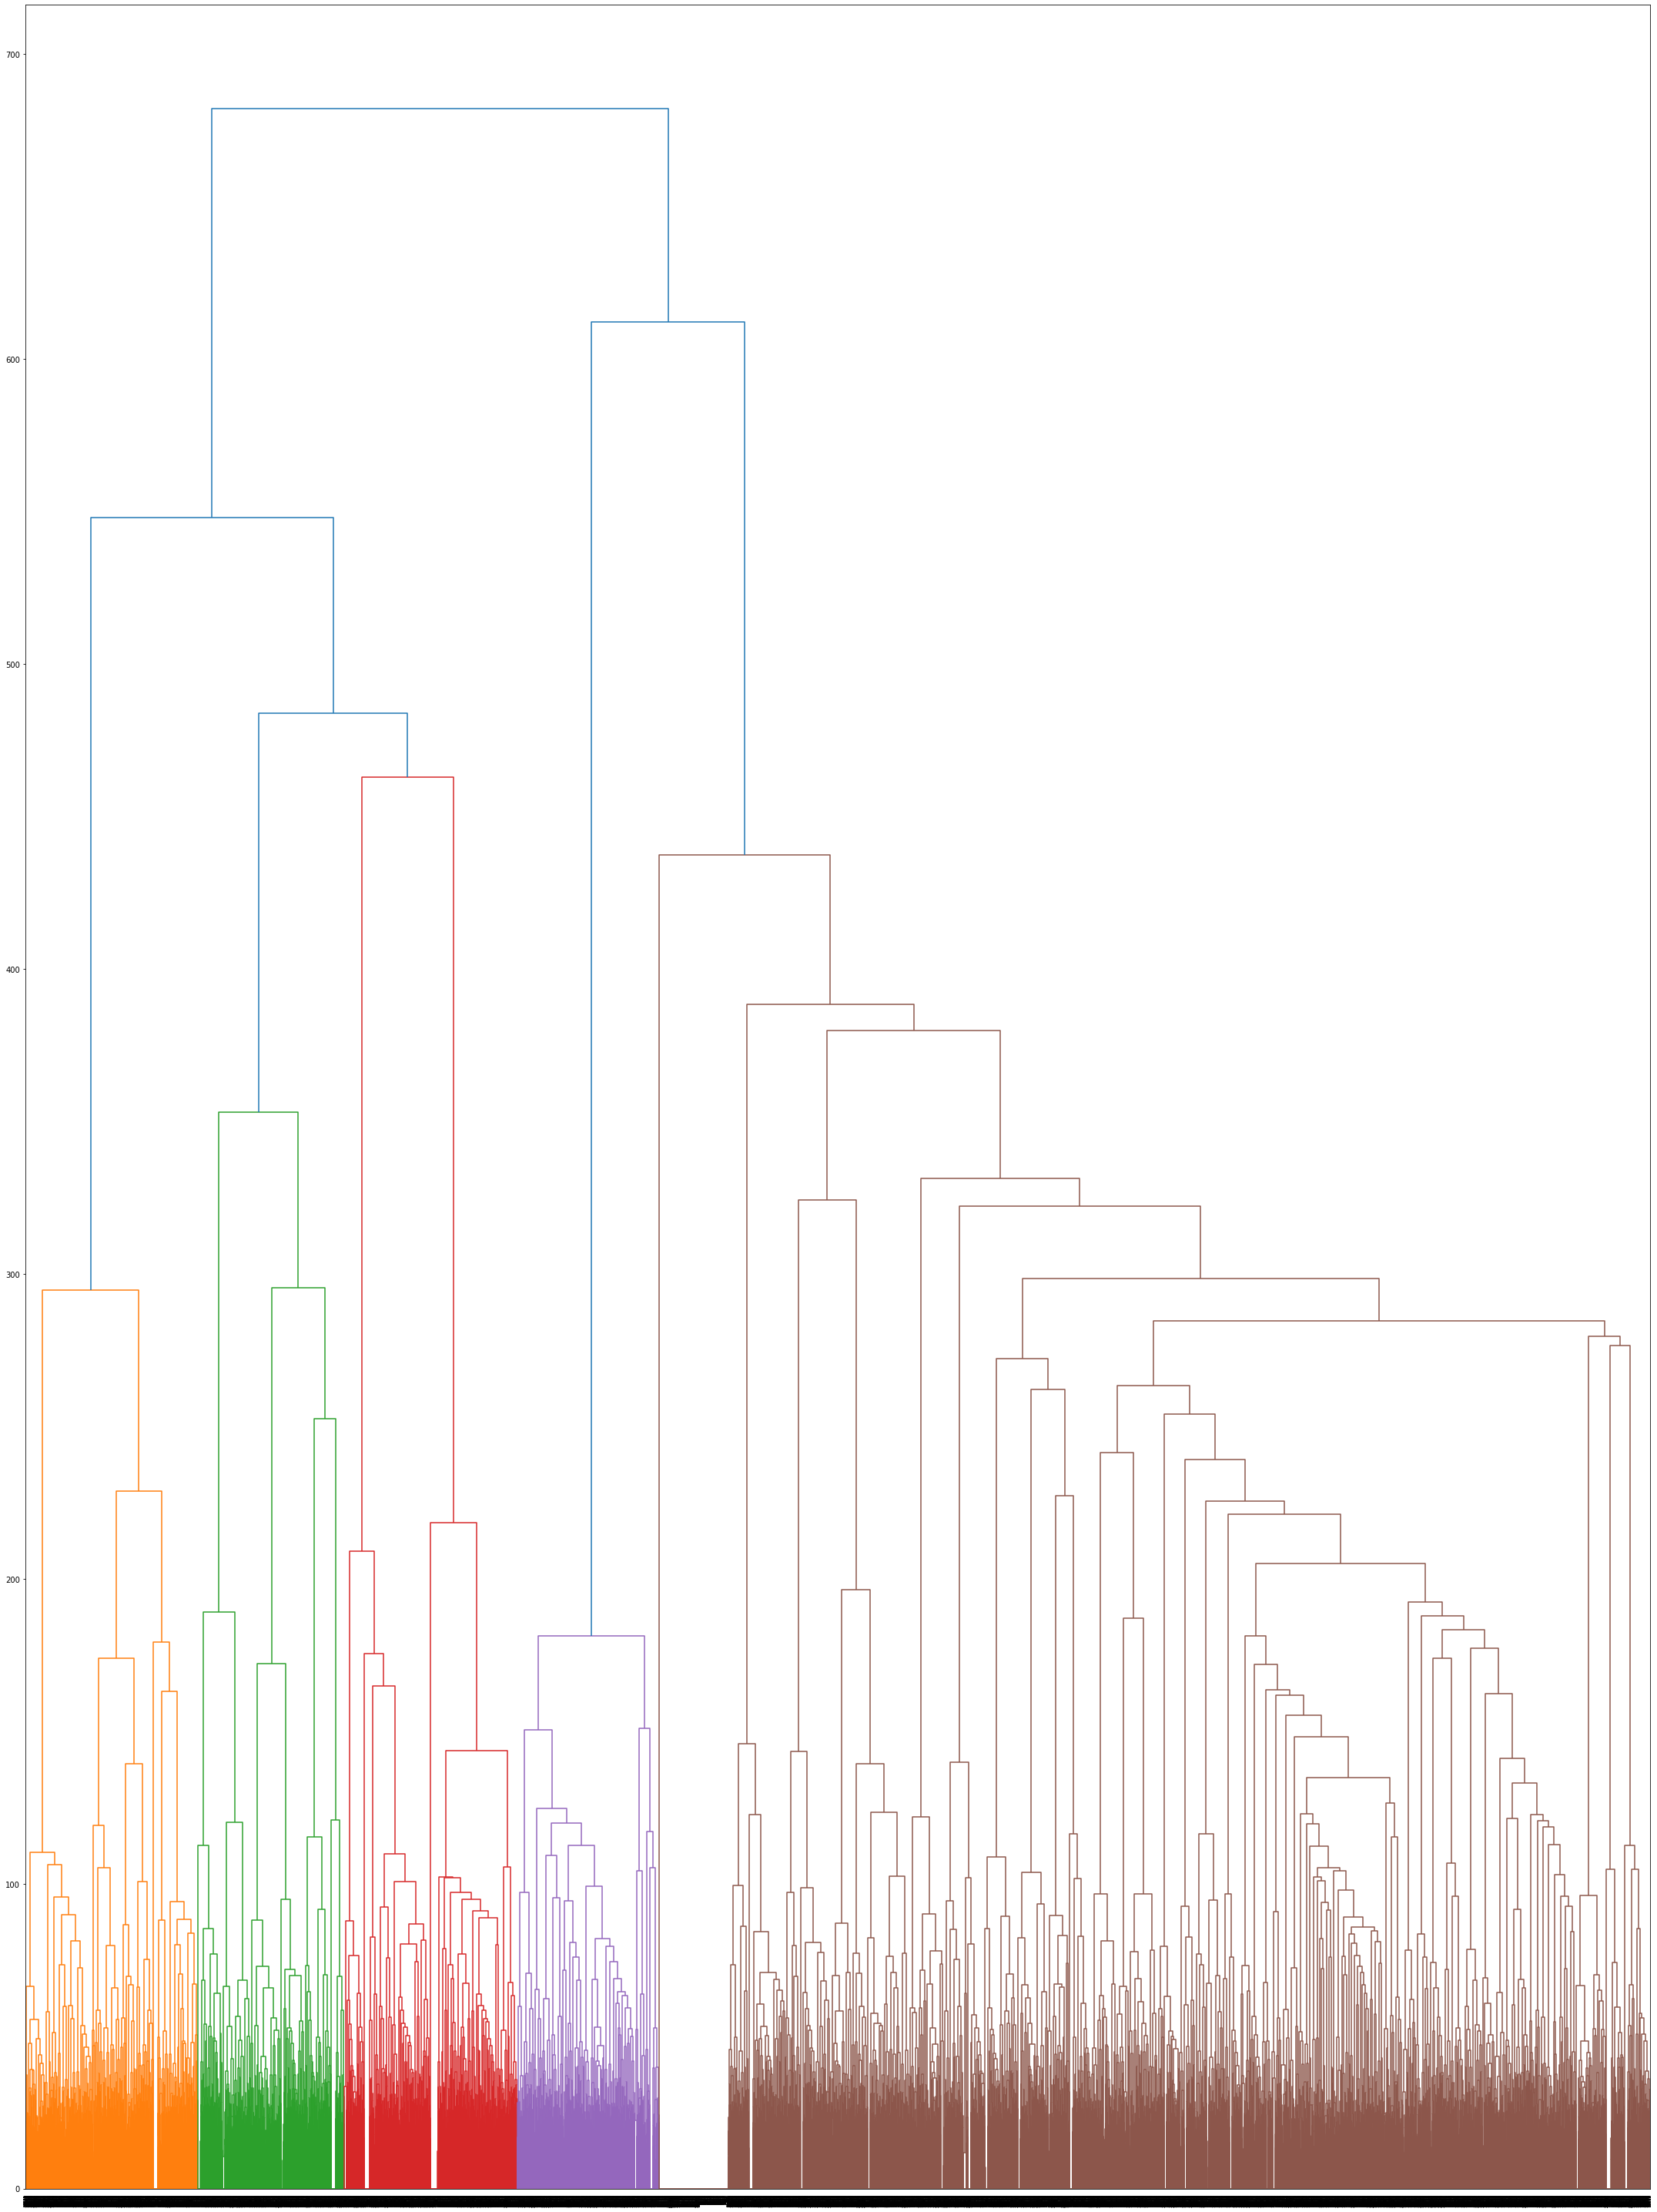

In [3]:
linkage_matrix = ward(dist)
fig, ax = plt.subplots(figsize=(30, 40)) # set size
ax = dendrogram(linkage_matrix, orientation="top");
plt.tight_layout()
plt.savefig('ward_clusters.png', dpi=
200)

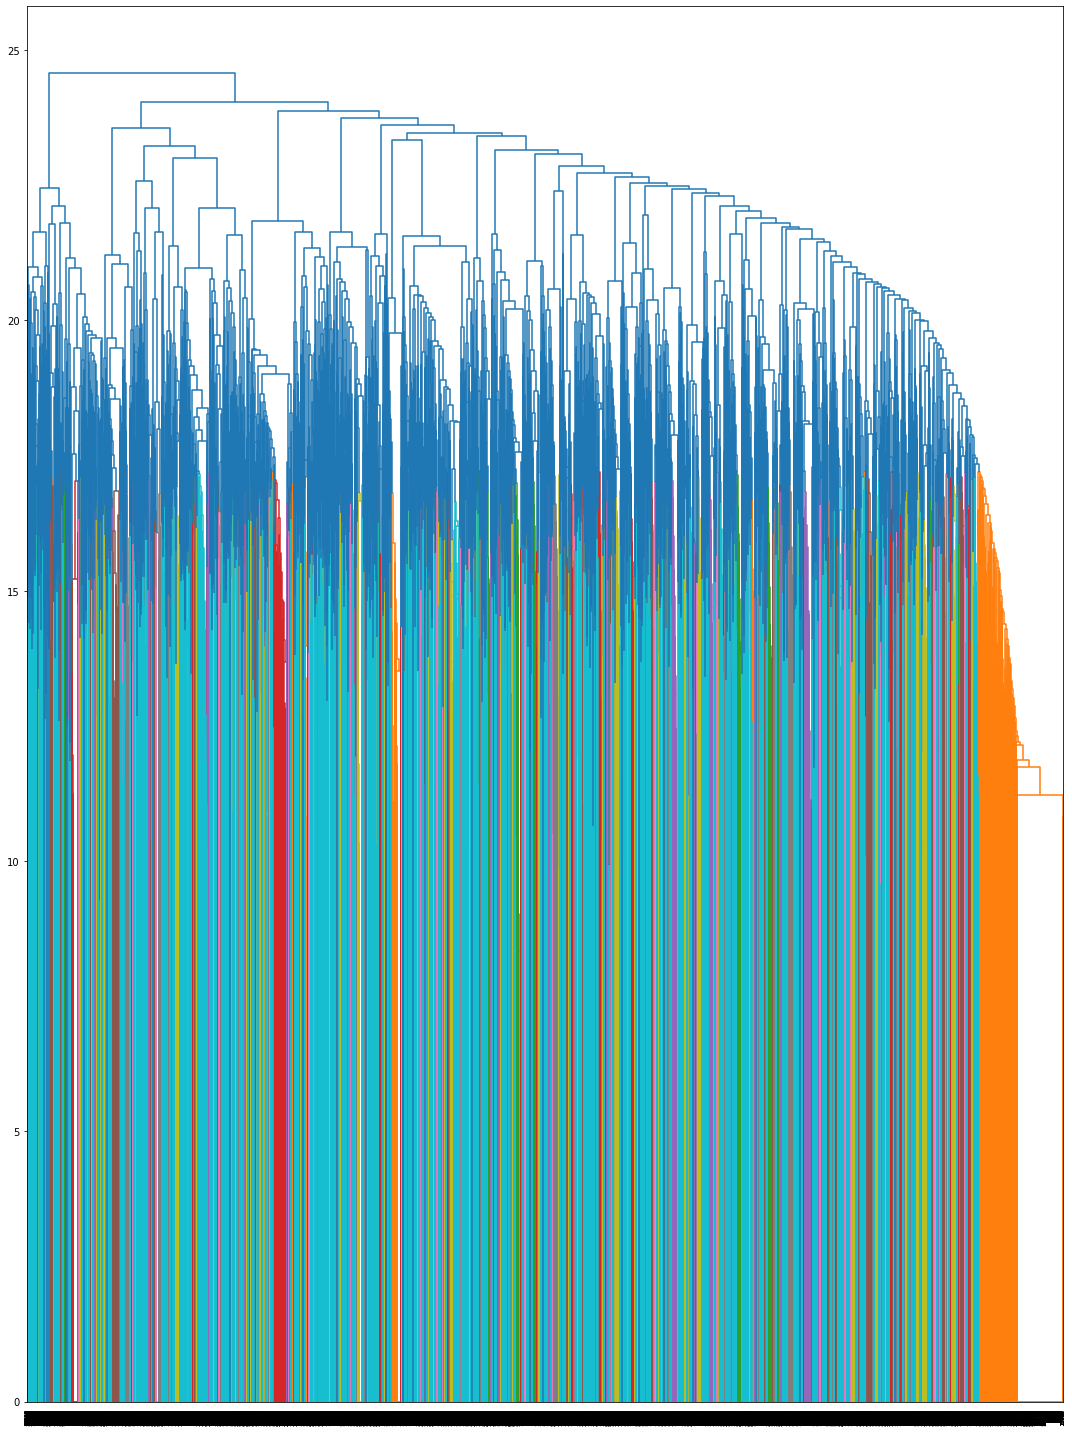

In [6]:
linkage_matrix = average(dist)
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="top");
plt.tight_layout()
plt.savefig('ward_clusters.png', dpi=200)

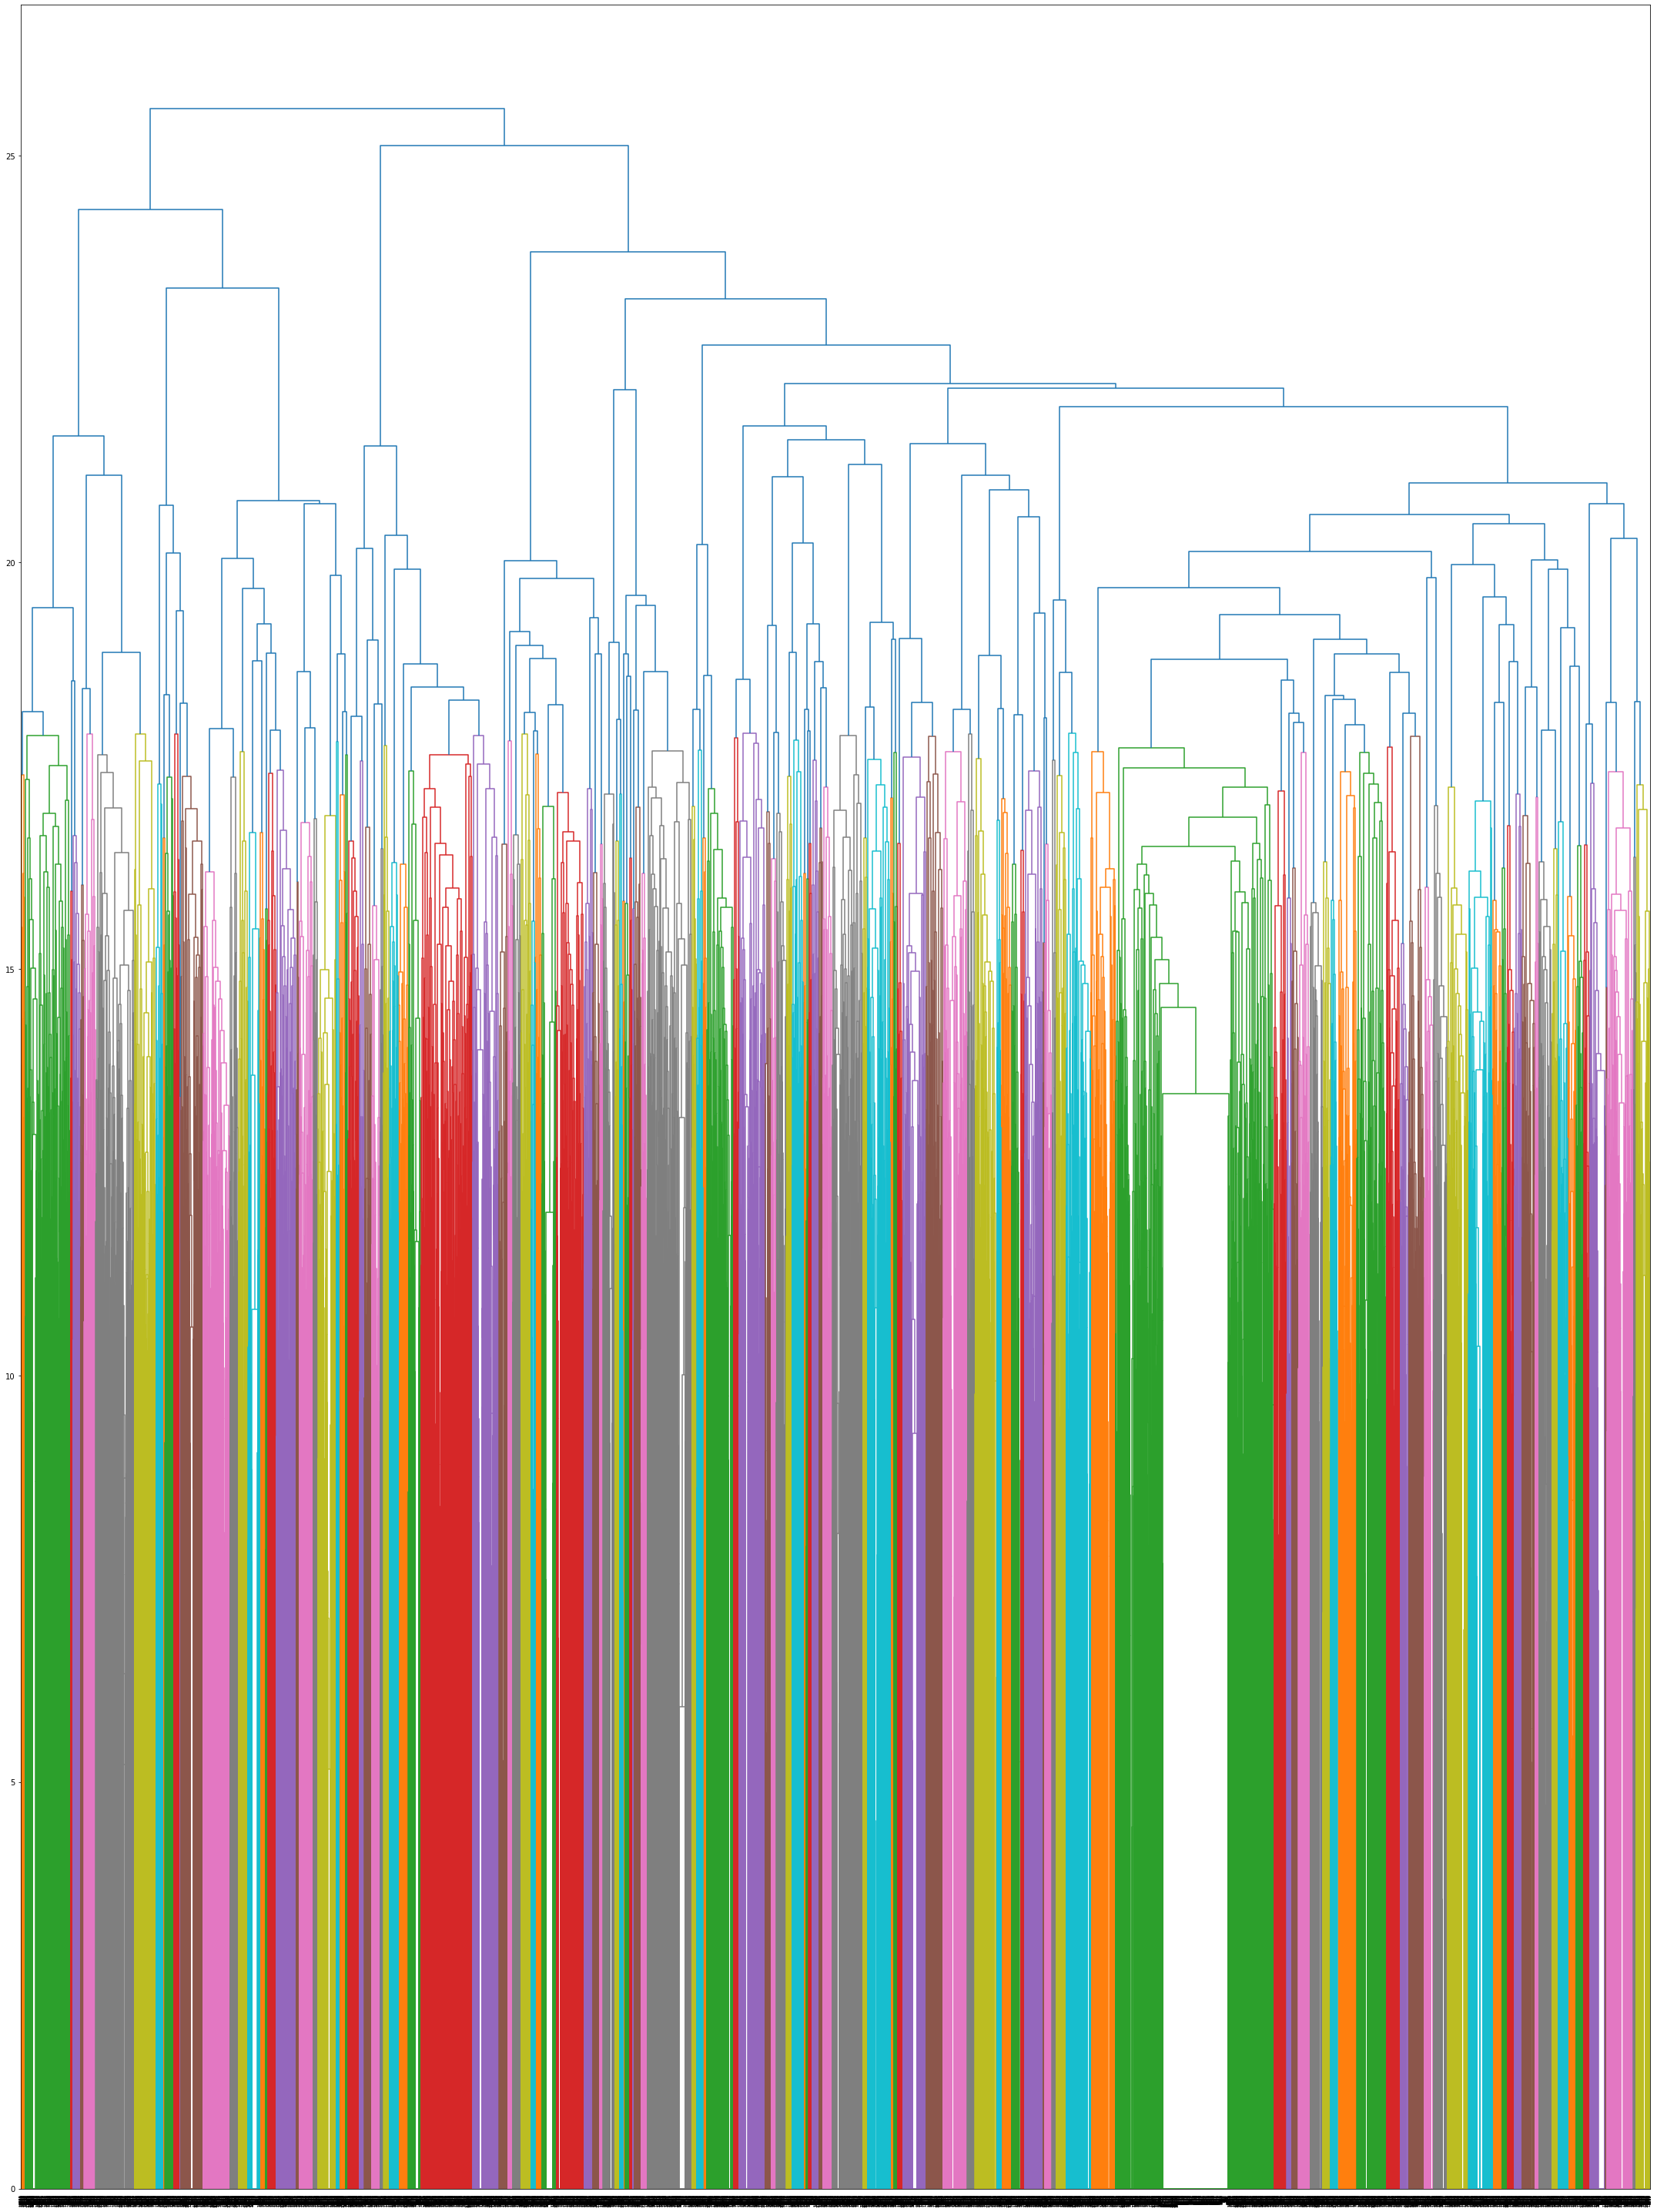

In [3]:
linkage_matrix = complete(dist)

fig, ax = plt.subplots(figsize=(30, 40)) # set size
ax = dendrogram(linkage_matrix, orientation="top");

plt.tight_layout()
plt.savefig('ward_clusters.png', dpi=200)

In [10]:
linkage_matrix = single(dist)

fig, ax = plt.subplots(figsize=(180, 200)) # set size
ax = dendrogram(linkage_matrix, orientation="top");
plt.tight_layout()

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=16, affinity='euclidean', linkage='ward')

cluster.fit_predict(X.toarray())
labels = cluster.labels_
labels

array([0, 5, 3, ..., 3, 0, 0])

In [12]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, labels)
sil_score

0.006231296144005437

In [13]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X.toarray(), labels)

3.7181305131720386

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='average')

cluster.fit_predict(X.toarray())
labels = cluster.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
sil_score = silhouette_score(X, labels)
sil_score

0.01270077627506614

In [16]:
davies_bouldin_score(X.toarray(), labels)

2.7882956821214955

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=22, affinity='euclidean', linkage='complete')

cluster.fit_predict(X.toarray())
labels = cluster.labels_
labels

array([ 9, 17, 20, ..., 20, 18, 11])

In [18]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels)
sil_score

-0.10873559889546959

In [19]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X.toarray(), labels)

4.560472870026593

In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single')

cluster.fit_predict(X.toarray())
labels = cluster.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels)
sil_score

-0.07960622547665097

In [22]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X.toarray(), labels)

0.9959768131432049